# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [96]:
df = pd.read_csv("breast-cancer-wisconsin-data.csv")

In [98]:
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [99]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [100]:
df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [101]:
df.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [102]:
df.isnull().count()
#no missing values

ID                             699
ClumpThickness                 699
Cell Size                      699
Cell Shape                     699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bare Nuclei                    699
Normal Nucleoli                699
Bland Chromatin                699
Mitoses                        699
Class                          699
dtype: int64

In [103]:
#find the dtype of the feature Bare Nuclei
df['Bare Nuclei'].dtype
# But the values are all Intergers. So i can say that the data is wrong somewhere.
# Have to correct the data.

dtype('O')

In [104]:
df_duplicated = df[df.duplicated()]
print(df_duplicated)

          ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
208  1218860               1          1           1                  1   
253  1100524               6         10          10                  2   
254  1116116               9         10          10                  1   
258  1198641               3          1           1                  1   
272   320675               3          3           5                  2   
338   704097               1          1           1                  1   
561  1321942               5          1           1                  1   
684   466906               1          1           1                  1   

     Single Epithelial Cell Size Bare Nuclei  Normal Nucleoli  \
208                            1           1                3   
253                            8          10                7   
254                           10           8                3   
258                            2           1                3   
272     

In [105]:
#replace '?'
len(df[df['Bare Nuclei'] == '?'])
df.replace(to_replace='?',value = np.NaN, inplace=True)

In [106]:
#df.isna().count()
len(df[df['Bare Nuclei'] == '?'])
df.info()
#so values are replaced with NAN, Now replace it with mean
df.replace(to_replace=np.nan, value = df.describe(include='all')['Bare Nuclei']['top'],inplace=True)
# The value 1 has the most no of occurance in the data set 402 values out of 699 records.
# So it is better to replace it with 1 rather than mean, median or mode.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [107]:
#checking the data again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [108]:
df.duplicated().sum()

9

In [109]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 11 columns):
ID                             690 non-null int64
ClumpThickness                 690 non-null int64
Cell Size                      690 non-null int64
Cell Shape                     690 non-null int64
Marginal Adhesion              690 non-null int64
Single Epithelial Cell Size    690 non-null int64
Bare Nuclei                    690 non-null object
Normal Nucleoli                690 non-null int64
Bland Chromatin                690 non-null int64
Mitoses                        690 non-null int64
Class                          690 non-null int64
dtypes: int64(10), object(1)
memory usage: 64.7+ KB


In [110]:
df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 11 columns):
ID                             690 non-null int64
ClumpThickness                 690 non-null int64
Cell Size                      690 non-null int64
Cell Shape                     690 non-null int64
Marginal Adhesion              690 non-null int64
Single Epithelial Cell Size    690 non-null int64
Bare Nuclei                    690 non-null int32
Normal Nucleoli                690 non-null int64
Bland Chromatin                690 non-null int64
Mitoses                        690 non-null int64
Class                          690 non-null int64
dtypes: int32(1), int64(10)
memory usage: 62.0 KB


In [112]:
df.drop(labels='ID',axis = 1,inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 690 non-null int64
Cell Size                      690 non-null int64
Cell Shape                     690 non-null int64
Marginal Adhesion              690 non-null int64
Single Epithelial Cell Size    690 non-null int64
Bare Nuclei                    690 non-null int32
Normal Nucleoli                690 non-null int64
Bland Chromatin                690 non-null int64
Mitoses                        690 non-null int64
Class                          690 non-null int64
dtypes: int32(1), int64(9)
memory usage: 56.6 KB


In [114]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [115]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [116]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


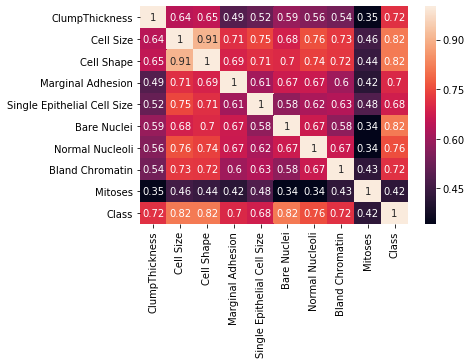

In [117]:
sns.heatmap(df.corr(), annot=True)
#Very strong co-relation between cell size and cell shape.
# In general co-relation is there among all the features.
# Target variable has high co-relation with the other features.

C:\Users\kmondal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kmondal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


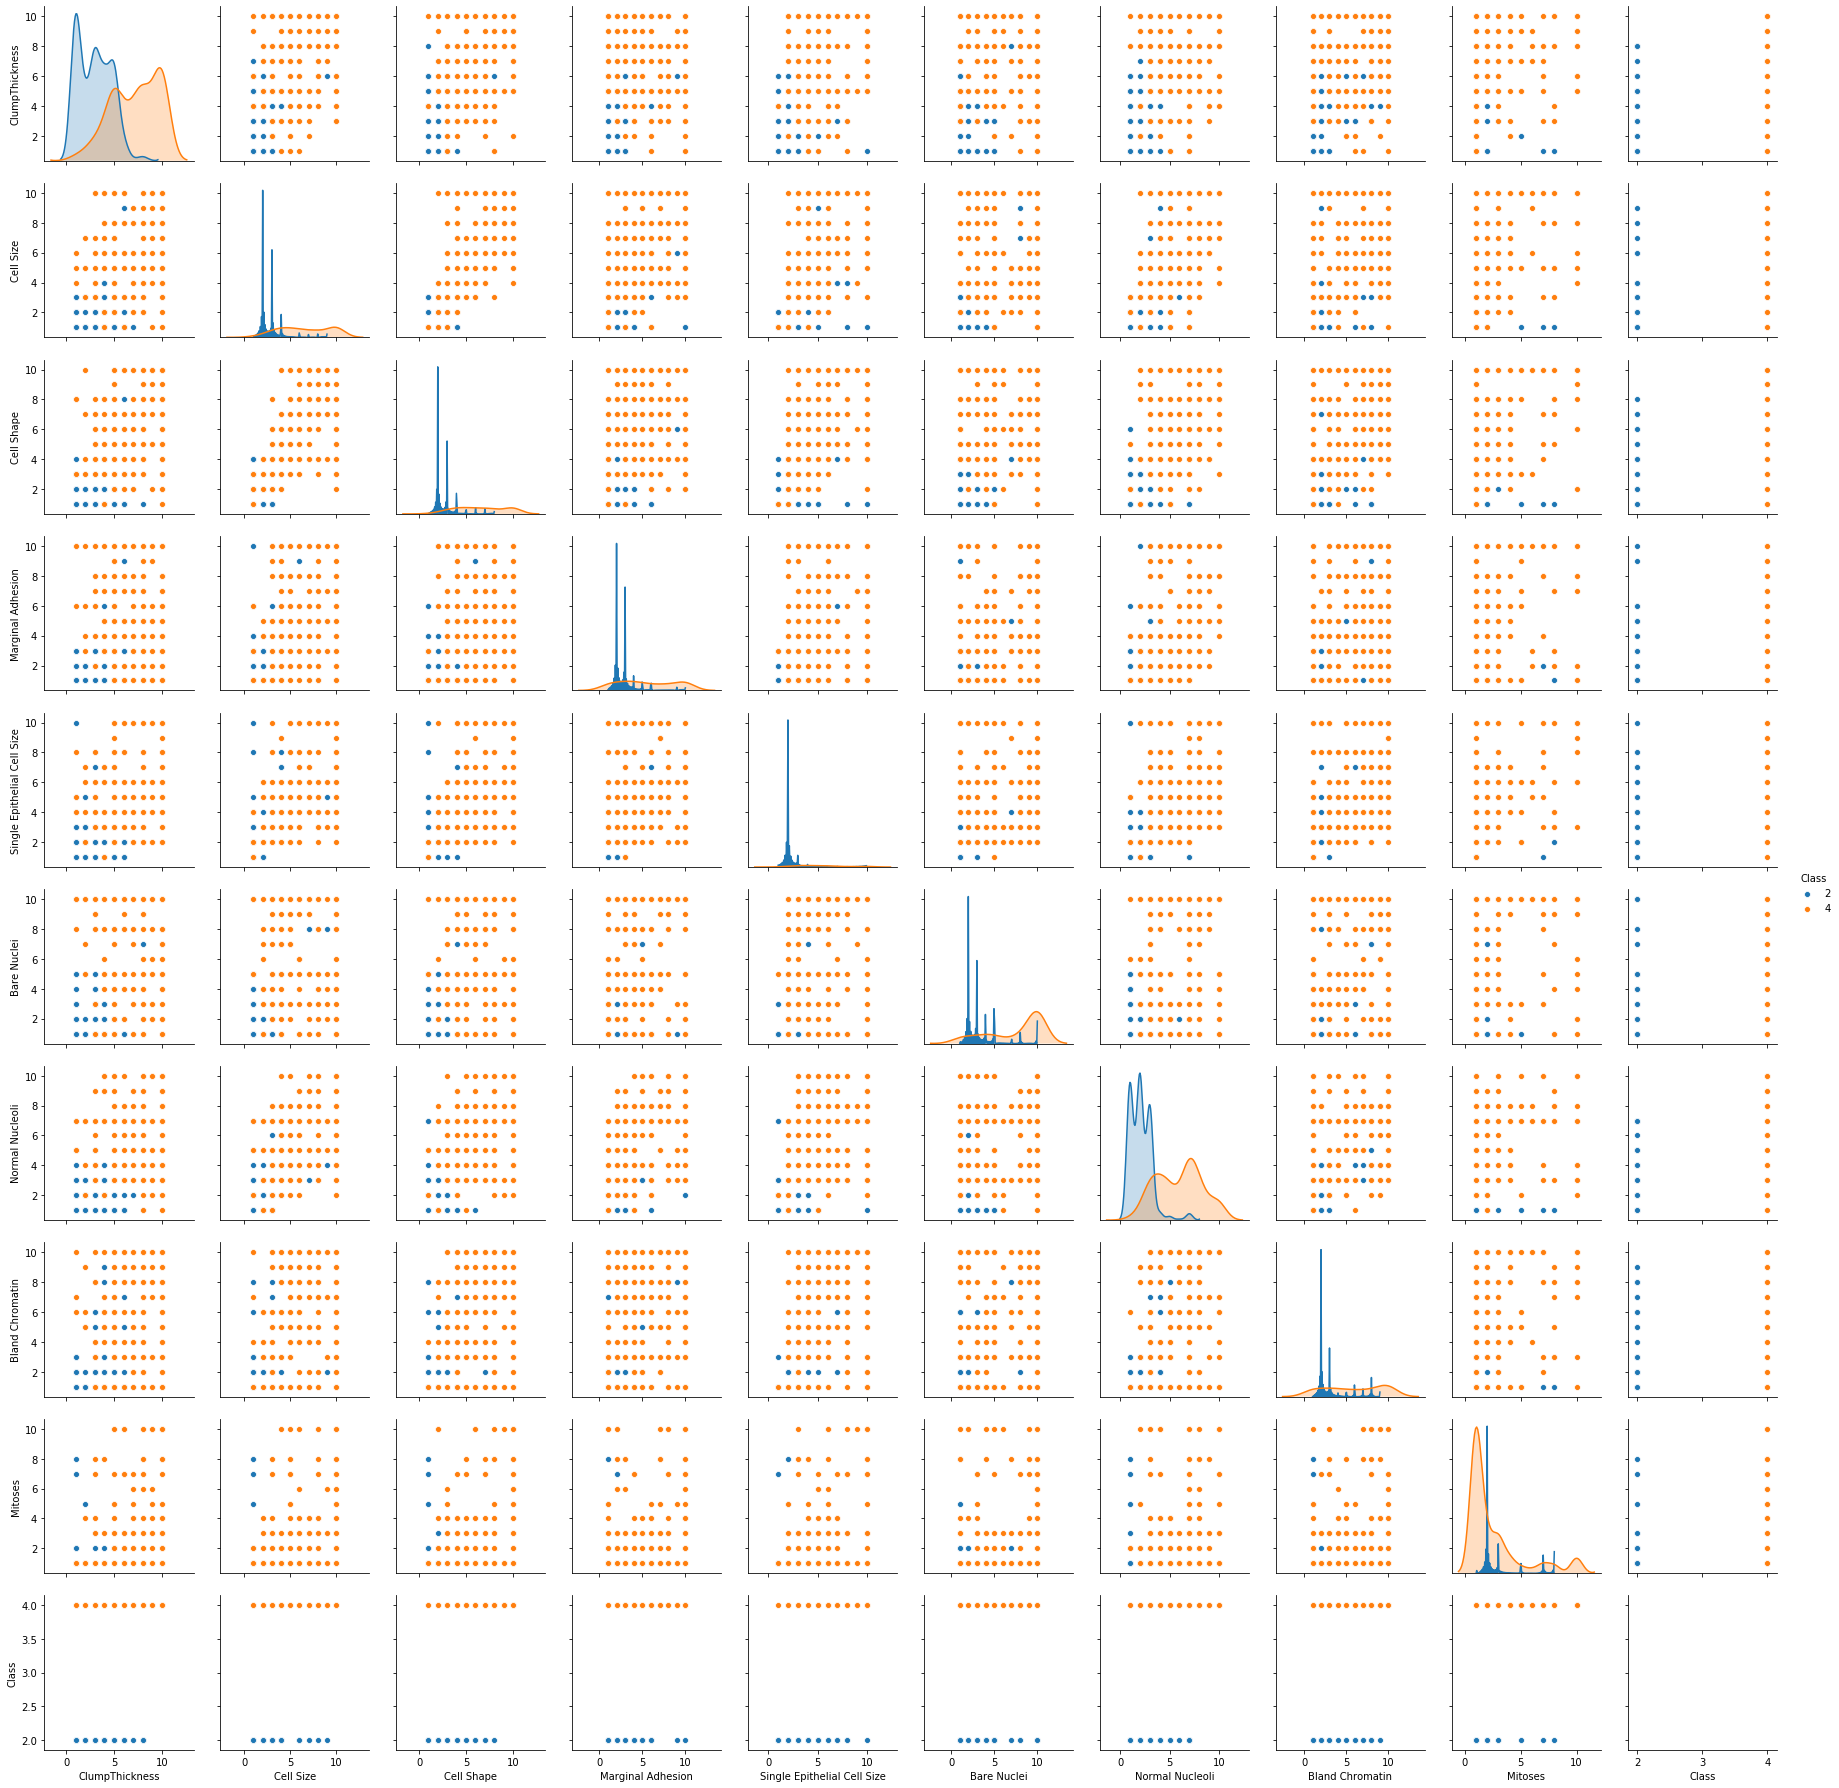

In [69]:
sns.pairplot(df,diag_kind='kde',hue='Class')

In [0]:
# Check for correlation of variable

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [0]:
#Let us check for pair plots

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

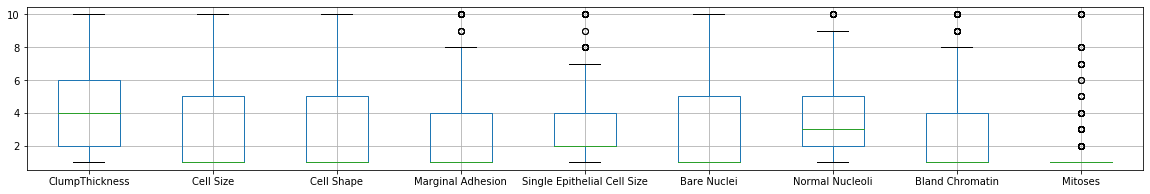

In [118]:
df.boxplot(figsize=(20,3),column=['ClumpThickness','Cell Size', 'Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Normal Nucleoli','Bland Chromatin','Mitoses'])

In [119]:
pd.crosstab(df['Marginal Adhesion'], df['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [120]:
#normalize the data and handling outliers.
df['Marginal Adhesion'] = np.where(df['Marginal Adhesion'] >4, 4, df['Marginal Adhesion'])

In [121]:
pd.crosstab(df['Single Epithelial Cell Size'], df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [122]:
df['Single Epithelial Cell Size'] = np.where(df['Single Epithelial Cell Size'] >4, 4, df['Single Epithelial Cell Size'])

In [123]:
pd.crosstab(df['Normal Nucleoli'], df['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [124]:
df['Normal Nucleoli'] = np.where(df['Normal Nucleoli'] >5, 5, df['Normal Nucleoli'])

In [125]:
pd.crosstab(df['Bland Chromatin'], df['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [126]:
df['Bland Chromatin'] = np.where(df['Bland Chromatin'] >4, 4, df['Bland Chromatin'])

In [127]:
pd.crosstab(df['Mitoses'], df['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [128]:
df['Mitoses'] = np.where(df['Mitoses'] >3, 3, df['Mitoses'])

In [138]:
df_target = df.pop('Class')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 690 non-null int64
Cell Size                      690 non-null int64
Cell Shape                     690 non-null int64
Marginal Adhesion              690 non-null int64
Single Epithelial Cell Size    690 non-null int64
Bare Nuclei                    690 non-null int32
Normal Nucleoli                690 non-null int64
Bland Chromatin                690 non-null int64
Mitoses                        690 non-null int64
dtypes: int32(1), int64(8)
memory usage: 51.2 KB


# Q6 Create a covariance matrix for identifying Principal components

In [140]:
# PCA
# Step 1 - Create covariance matrix
Cov_matrix = np.cov(df.T)

In [141]:
Cov_matrix

array([[ 7.93762016,  5.51311079,  5.45212343,  2.02134999,  1.58362256,
         6.01908248,  2.38880966,  2.10597589,  0.808296  ],
       [ 5.51311079,  9.25650701,  8.15558781,  2.84857281,  2.26463474,
         7.53352685,  3.21412675,  2.88911466,  1.04344461],
       [ 5.45212343,  8.15558781,  8.76659936,  2.70385562,  2.13964788,
         7.54129488,  3.06406891,  2.78168739,  0.95720957],
       [ 2.02134999,  2.84857281,  2.70385562,  1.68629183,  0.86946005,
         3.26875749,  1.24404198,  1.10828548,  0.37018573],
       [ 1.58362256,  2.26463474,  2.13964788,  0.86946005,  0.92942933,
         2.3775478 ,  0.95927726,  0.91140279,  0.30098231],
       [ 6.01908248,  7.53352685,  7.54129488,  3.26875749,  2.3775478 ,
        13.08315139,  3.66926863,  3.03232158,  1.09873793],
       [ 2.38880966,  3.21412675,  3.06406891,  1.24404198,  0.95927726,
         3.66926863,  2.17119749,  1.32248375,  0.40383458],
       [ 2.10597589,  2.88911466,  2.78168739,  1.10828548,  0

In [142]:
eigenVal, eigenVec = np.linalg.eig(Cov_matrix)

# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [143]:
print(eigenVal)
print(eigenVec)

[34.3933176   4.39142458  3.56237986  1.0383093   0.30197925  0.2730134
  0.8126698   0.57318633  0.64811628]
[[-0.37375635 -0.30873784 -0.87242043 -0.04014893  0.02571459  0.0054678
  -0.03705665 -0.01268393  0.00570774]
 [-0.4757256  -0.37194576  0.36118887  0.11619805  0.0732024   0.08609145
  -0.66622323  0.0703283   0.17266244]
 [-0.46543042 -0.31676737  0.31031262 -0.50653107 -0.04004728  0.00180703
   0.56750873 -0.07089257 -0.0382929 ]
 [-0.17502583  0.02817906  0.05844278  0.29140262 -0.03384307  0.13612409
  -0.02986642 -0.67791805 -0.63253526]
 [-0.13379104 -0.02080085  0.04977471  0.1737996   0.06042768 -0.95442029
   0.01186932  0.07529566 -0.16912585]
 [-0.54269718  0.81404601 -0.04418126 -0.15602019  0.0261224   0.0247123
  -0.09257252  0.0656098   0.04844778]
 [-0.19990597  0.01816778  0.03928374  0.62290033 -0.08356945  0.01772965
   0.38470257 -0.24247826  0.59671563]
 [-0.17468491 -0.03990416  0.05235229  0.44382937  0.19822873  0.2492488
   0.26876109  0.65163207 -0

# Q8 Find variance and cumulative variance by each eigen vector

In [144]:
tot = sum(eigenVal)

In [145]:
var_explained = [(i / tot) for i in sorted(eigenVal, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)

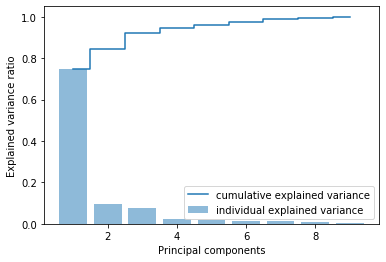

In [147]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [148]:
from sklearn.decomposition import PCA

In [150]:
pca = PCA(n_components=6)
X = pca.fit_transform(df)

In [151]:
X

array([[-3.59117949,  0.67827446,  1.97614706,  0.4704228 , -0.20961936,
        -0.8284441 ],
       [ 5.08390768, -4.58503155,  0.03204386, -0.4391216 ,  0.71677636,
         0.98045322],
       [-3.79599502, -0.75324723,  0.27548746,  0.39470047, -0.19116014,
        -0.86547638],
       ...,
       [ 7.5680415 ,  5.33047559, -4.42956739,  0.21519881, -0.62210872,
        -0.38018119],
       [ 4.9031222 ,  2.13449635, -3.30434215,  1.94853834,  0.35910206,
         0.12458349],
       [ 6.51047127,  1.97478593, -3.93056084,  0.95325561, -0.69521221,
         0.32184735]])

# Q10 Find correlation between components and features

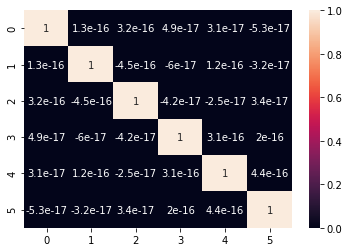

In [155]:
sns.heatmap(pd.DataFrame(X).corr(), annot=True)

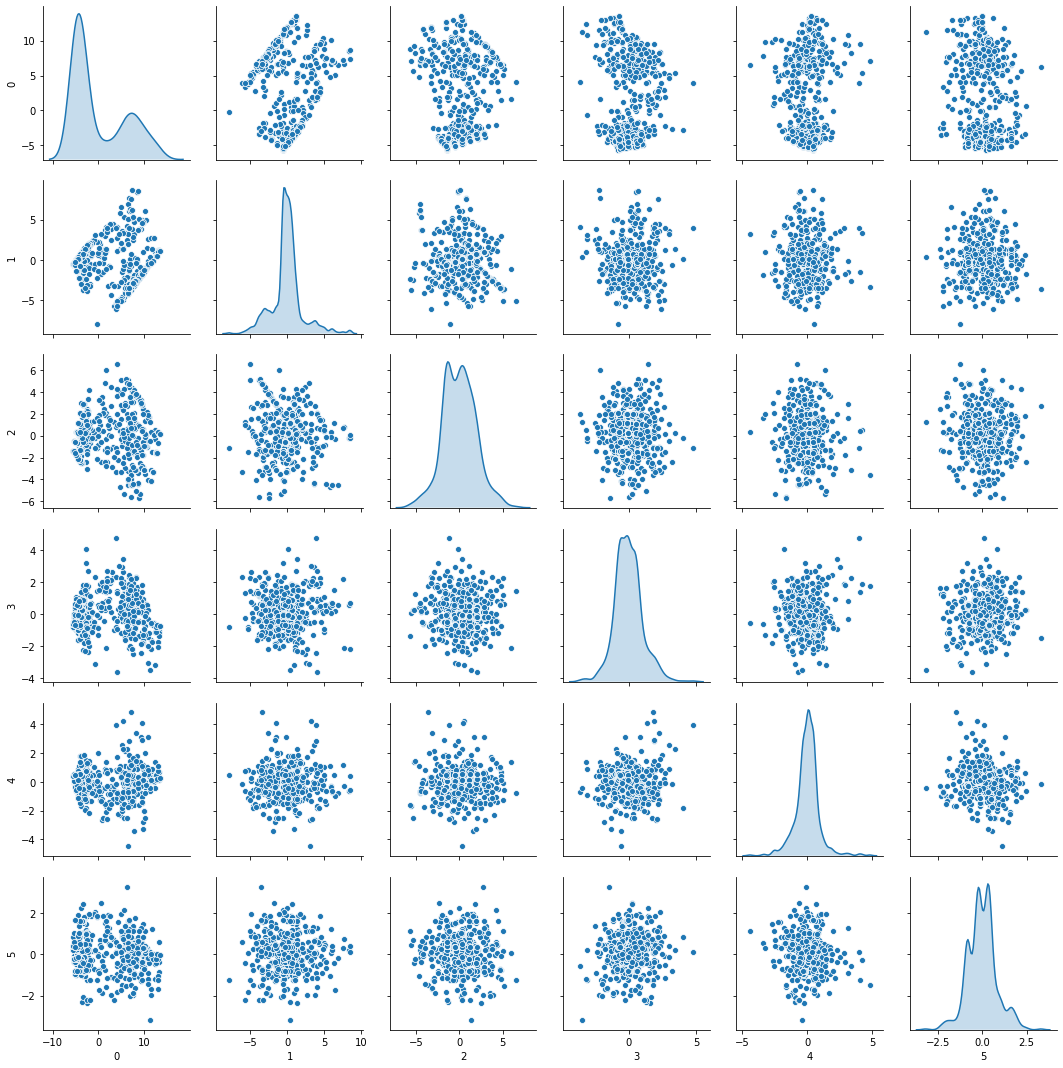

In [156]:
sns.pairplot(pd.DataFrame(X), diag_kind='kde')

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [185]:
df_recommendation = pd.read_csv('jokes.csv')

In [186]:
df_recommendation.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [187]:
df_rating_matrix = df_recommendation.loc[0:200,:]

In [188]:
df_rating_matrix.head(5)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [189]:
df_rating_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Columns: 101 entries, NumJokes to Joke100
dtypes: float64(100), int64(1)
memory usage: 158.7 KB


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [190]:
df_rating_matrix.replace(to_replace=99.00,value = 0, inplace=True)

C:\Users\kmondal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [191]:
len(df_rating_matrix[df_rating_matrix['Joke1'] == 99.00])

0

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [192]:
df_rating_matrix.pop('NumJokes')

0       74
1      100
2       49
3       48
4       91
5      100
6       47
7      100
8      100
9       72
10      36
11     100
12      47
13     100
14     100
15     100
16      51
17     100
18      49
19      53
20      55
21      50
22      72
23     100
24      74
25      67
26      60
27      72
28      54
29      46
      ... 
171     67
172     43
173     43
174     38
175     72
176     94
177     44
178     53
179     44
180     40
181     57
182     63
183     54
184     59
185     73
186     73
187     39
188     41
189     67
190     61
191     71
192    100
193    100
194    100
195    100
196     71
197    100
198     43
199     71
200     67
Name: NumJokes, Length: 201, dtype: int64

In [193]:
df_rating_matrix.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [194]:
df_rating_matrix.mean().sort_values(ascending=False).head(10)

Joke50    4.070746
Joke36    3.630498
Joke53    3.553234
Joke35    3.246468
Joke29    3.205721
Joke27    3.079254
Joke49    2.875174
Joke62    2.801741
Joke32    2.766915
Joke31    2.643383
dtype: float64

In [195]:
df_rating_matrix.describe()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.527413,0.590945,0.236468,-0.668507,-0.002438,1.319751,0.209751,-0.040697,0.036169,0.904975,...,0.600846,0.174229,1.150100,0.634726,0.578756,0.415473,0.751244,0.093234,0.134328,0.521791
std,4.496643,4.903181,4.460078,3.881620,5.443532,4.382328,5.639624,4.890538,4.037137,4.995637,...,2.973078,3.164729,3.192297,3.466334,3.306541,2.974122,3.235931,3.488693,3.257426,3.258286
min,-9.710000,-9.950000,-9.710000,-9.760000,-9.810000,-9.850000,-9.950000,-9.850000,-9.850000,-9.760000,...,-9.130000,-9.610000,-9.710000,-9.560000,-9.760000,-9.510000,-9.130000,-9.660000,-9.760000,-9.560000
25%,-0.830000,-2.570000,-0.630000,-1.600000,-4.220000,0.000000,-4.470000,-4.270000,-0.440000,-1.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.340000,0.000000,0.970000,0.780000,0.000000,0.730000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.400000,4.510000,2.330000,0.000000,4.270000,4.900000,4.760000,3.500000,1.410000,4.270000,...,0.000000,0.000000,1.600000,0.190000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000
max,9.270000,9.270000,9.270000,8.830000,9.220000,9.270000,9.270000,9.270000,9.030000,9.320000,...,9.080000,9.080000,9.170000,9.080000,9.130000,9.220000,9.170000,9.220000,8.980000,8.980000
